In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [107]:
df = pd.read_csv('../data/CAISO-20170701-20201030.csv')
df['start_dt'] = pd.to_datetime(df['start_dt'])
df['end_dt'] = pd.to_datetime(df['end_dt'])
df['covariate_x'] = df['end_dt'].apply(lambda i:[i.week,i.dayofweek,i.hour])
df['ramp_z'] = df['total_integrated_load_MW'] - df['solar_generation_MW'] - df['wind_generation_MW']
df.to_csv('../data/CAISO-20170701-20201030.csv',index=False)
df.head()


,start_dt,end_dt,total_integrated_load_MW,solar_generation_MW,wind_generation_MW,covariate_x,ramp_z
0,2017-07-01 07:00:00+00:00,2017-07-01 08:00:00+00:00,25703,-31.09459,2881.98320,"[26, 5, 8]",22852.11139
1,2017-07-01 08:00:00+00:00,2017-07-01 09:00:00+00:00,24043,-30.83811,2765.90229,"[26, 5, 9]",21307.93582
2,2017-07-01 09:00:00+00:00,2017-07-01 10:00:00+00:00,22988,-30.48083,2791.72076,"[26, 5, 10]",20226.76007
3,2017-07-01 10:00:00+00:00,2017-07-01 11:00:00+00:00,22423,-31.98818,2549.59684,"[26, 5, 11]",19905.39134
4,2017-07-01 11:00:00+00:00,2017-07-01 12:00:00+00:00,22235,-32.67630,2502.67552,"[26, 5, 12]",19765.00078


In [106]:
display(df.shape)
display(df.isnull().any())
display(df.iloc[:1].dtypes)
display(df.describe())

(28232, 7)

start_dt                    False
end_dt                      False
total_integrated_load_MW    False
solar_generation_MW         False
wind_generation_MW          False
covariate_x                 False
ramp                        False
dtype: bool

start_dt                    datetime64[ns, UTC]
end_dt                      datetime64[ns, UTC]
total_integrated_load_MW                  int64
solar_generation_MW                     float64
wind_generation_MW                      float64
covariate_x                              object
ramp                                    float64
dtype: object

,total_integrated_load_MW,solar_generation_MW,wind_generation_MW,ramp
count,28232.000000,28232.000000,28232.000000,28232.000000
mean,25782.140196,3029.728087,1547.241537,21205.170572
std,5144.605567,3710.050302,1140.165624,5613.959813
min,15691.000000,-111.509860,-2352.137030,5997.635900
25%,22073.000000,-16.935672,471.157995,17694.332355
50%,24778.500000,206.507280,1406.256105,20781.135645
75%,27851.250000,6695.674185,2449.800952,24479.004565
max,49909.000000,11244.160640,4653.786800,46985.669910


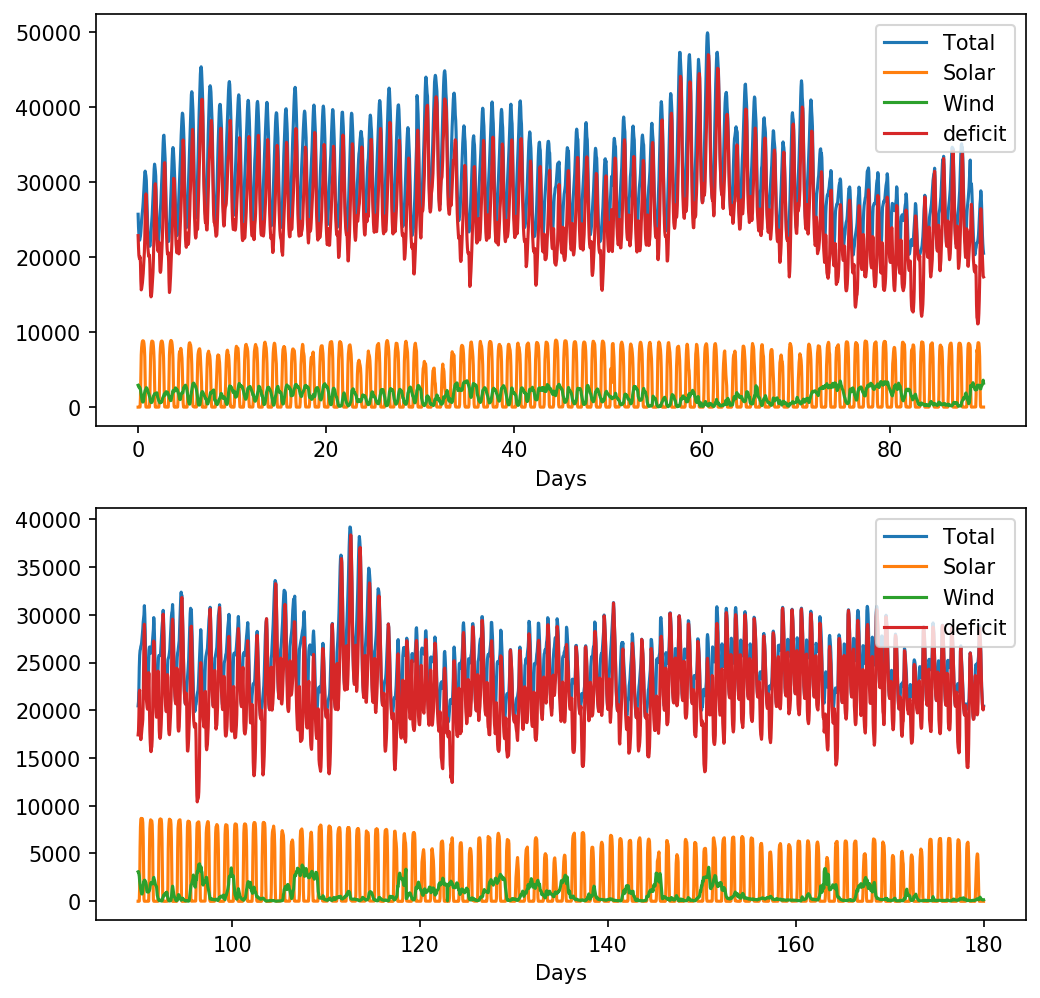

In [46]:
plt.figure(figsize=(8,8),dpi=150)
days = 90
plt.subplot(211)
plt.plot(df.index[:24*days]/24,df['total_integrated_load_MW'][:24*days])
plt.plot(df.index[:24*days]/24,df['solar_generation_MW'][:24*days])
plt.plot(df.index[:24*days]/24,df['wind_generation_MW'][:24*days])
plt.plot(df.index[:24*days]/24,(df['total_integrated_load_MW'] - df['wind_generation_MW']
                             - df['solar_generation_MW'])[:24*days])
plt.xlabel('Days')
plt.legend(['Total','Solar','Wind','deficit'])

plt.subplot(212)
days = 180
start_day = 90*24
plt.plot(df.index[start_day:24*days]/24,df['total_integrated_load_MW'][start_day:24*days])
plt.plot(df.index[start_day:24*days]/24,df['solar_generation_MW'][start_day:24*days])
plt.plot(df.index[start_day:24*days]/24,df['wind_generation_MW'][start_day:24*days])
plt.plot(df.index[start_day:24*days]/24,(df['total_integrated_load_MW'] - df['wind_generation_MW']
                             - df['solar_generation_MW'])[start_day:24*days])
plt.xlabel('Days')
plt.legend(['Total','Solar','Wind','deficit'])

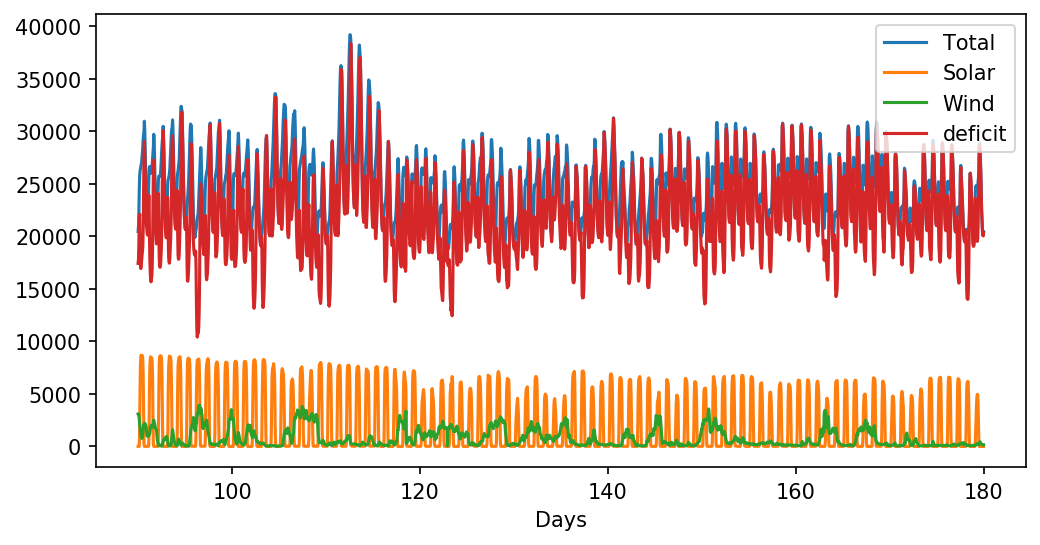

In [42]:
plt.figure(figsize=(8,4),dpi=150)


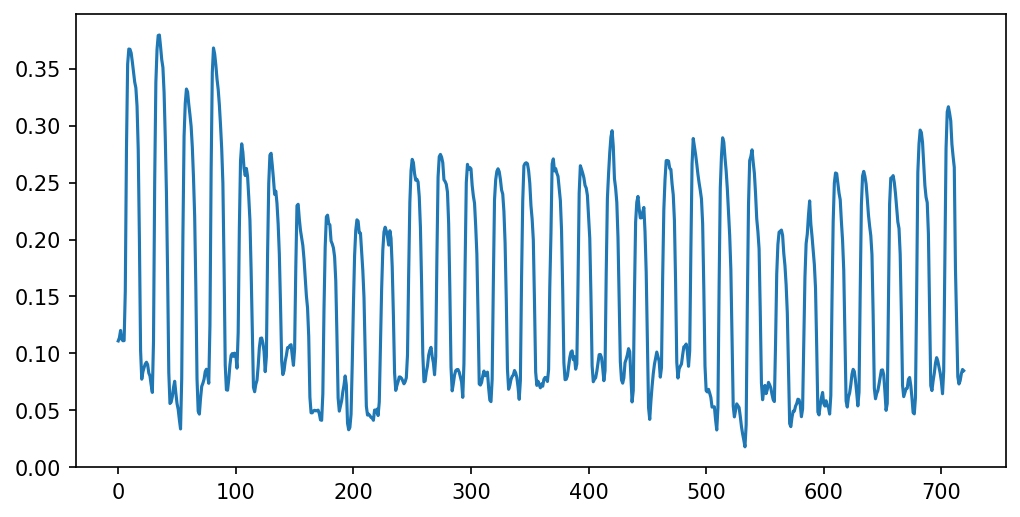

In [48]:
plt.figure(figsize=(8,4),dpi=150)
plt.plot(df.index[:24*days],((df['wind_generation_MW']
                             + df['solar_generation_MW'])/df['total_integrated_load_MW'])[:24*days])

In [50]:
edf = pd.read_csv('EIA-20180701-20201109.csv')
edf.drop('Unnamed: 0',inplace=True,axis=1)
edf.head()

,dt,demand_MWh,wind_gen_MWh,solar_gen_MWh
0,2018-07-01 08:00:00+00:00,26061,3958,0
1,2018-07-01 09:00:00+00:00,24604,4087,0
2,2018-07-01 10:00:00+00:00,23554,3710,0
3,2018-07-01 11:00:00+00:00,22843,3630,0
4,2018-07-01 12:00:00+00:00,22538,3156,0


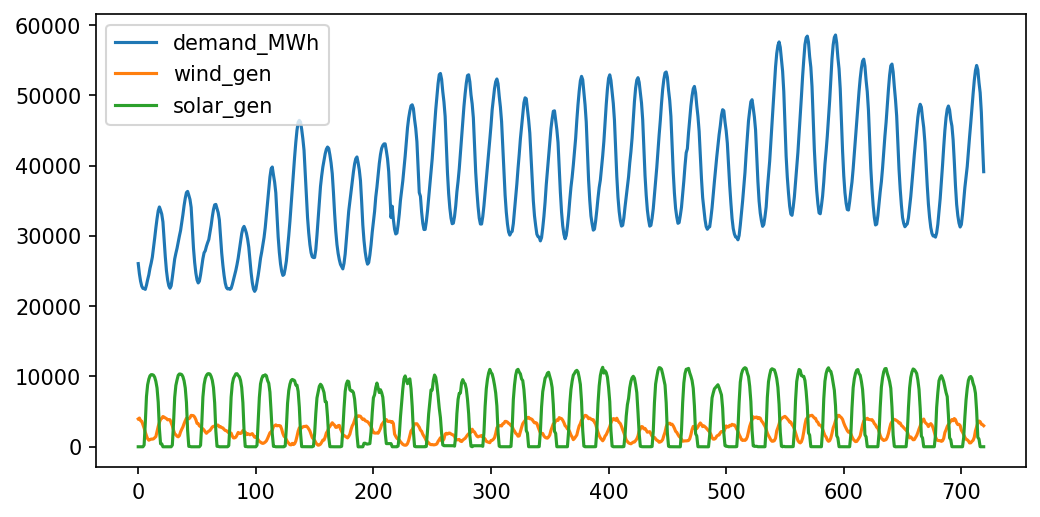

In [56]:
plt.figure(figsize=(8,4),dpi=150)
plt.plot(edf.index[:24*days],edf['demand_MWh'][:24*days])
plt.plot(edf.index[:24*days],edf['wind_gen_MWh'][:24*days])
plt.plot(edf.index[:24*days],edf['solar_gen_MWh'][:24*days])
plt.legend(['demand_MWh','wind_gen','solar_gen'])

In [66]:
df['total_integrated_load_MW'].max()

49909

In [77]:
def plot(plt,index,edf,df,name):
    plt.plot(index,edf)
    plt.plot(index,df)
    plt.legend(['EIA','CAISO'])
    plt.title(name)
    plt.ylim([min(df.min(),edf.min())-2000,max(df.max(),edf.max())+2000])

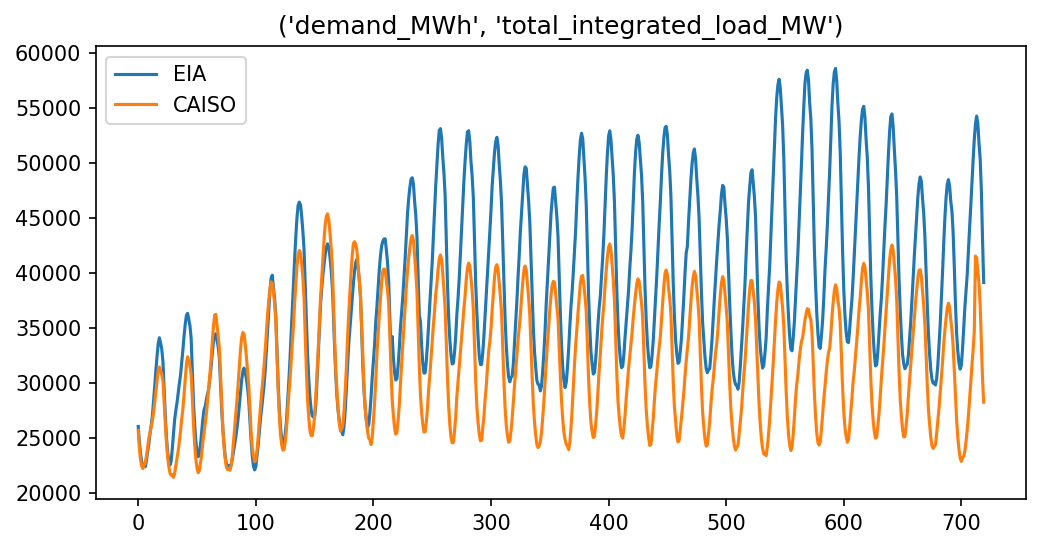

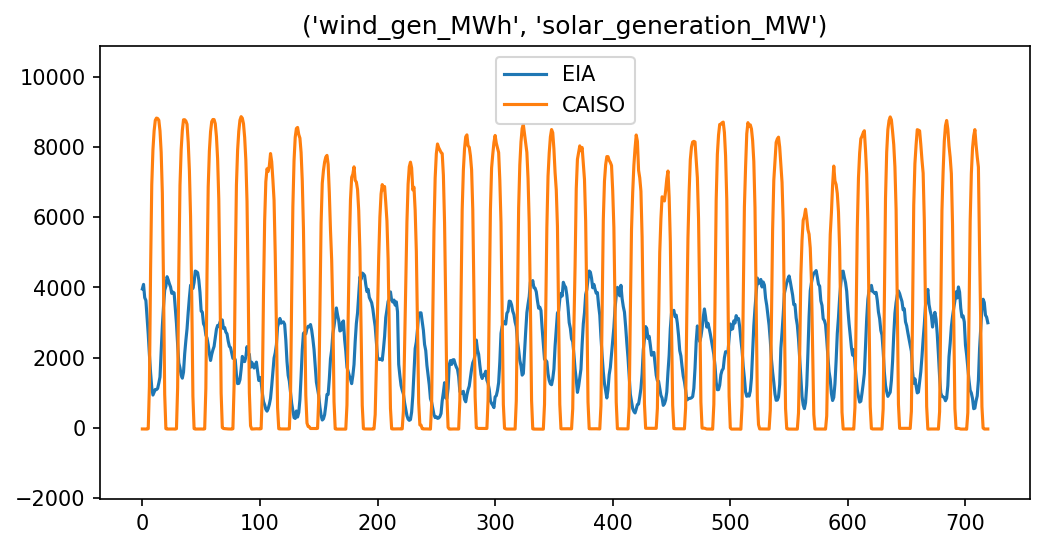

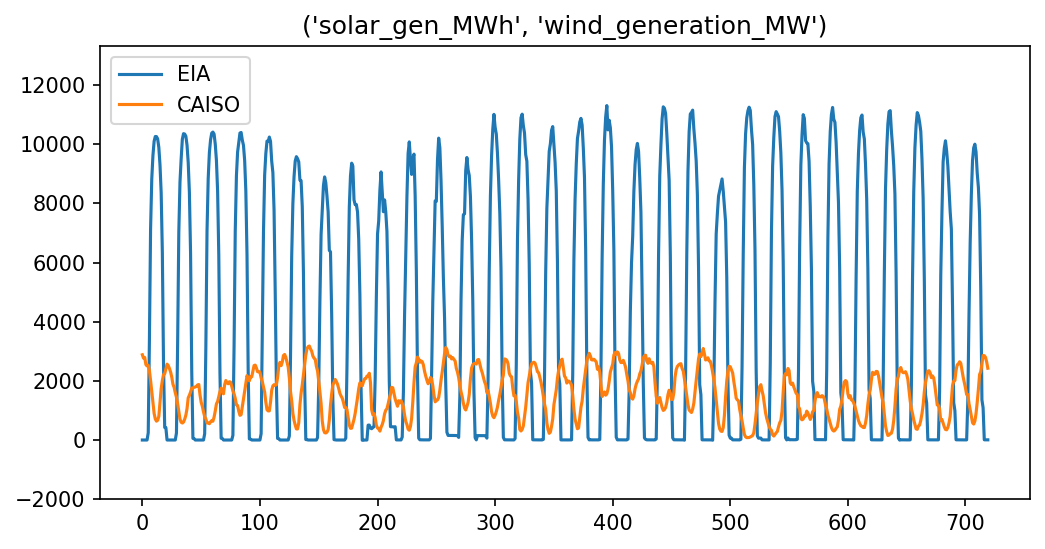

In [78]:
for e,d in zip(edf.columns[1:],df.columns[2:]):
    plt.figure(figsize=(8,4),dpi=150)
    plot(plt,edf.index[:24*days],edf[e][:24*days],df[d][:24*days],(e,d))

In [58]:
edf.columns

Index(['dt', 'demand_MWh', 'wind_gen_MWh', 'solar_gen_MWh'], dtype='object')

In [50]:
import mxnet as mx
import os
import tarfile

mx.random.seed(42) # Fix the seed for reproducibility
X = mx.random.uniform(shape=(10, 3))
y = mx.random.uniform(shape=(10, 1))

In [51]:
dataset[0]

(
 [0.82909364 0.7478349  0.55818135]
 <NDArray 3 @cpu(0)>, 
 [0.22065327]
 <NDArray 1 @cpu(0)>)

In [55]:
sample_idx = 4
sample = dataset[sample_idx]

assert len(sample) == 2
assert sample[0].shape == (3, )
assert sample[1].shape == (1, )
print(sample[1])


[0.35440788]
<NDArray 1 @cpu(0)>


In [53]:
from multiprocessing import cpu_count
CPU_COUNT = cpu_count()

data_loader = mx.gluon.data.DataLoader(dataset, batch_size=5, num_workers=CPU_COUNT)

for X_batch, y_batch in data_loader:
    print("X_batch has shape {}, and y_batch has shape {}".format(X_batch.shape, y_batch.shape))

X_batch has shape (5, 3), and y_batch has shape (5, 1)
X_batch has shape (5, 3), and y_batch has shape (5, 1)
